<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2
#### Milena Waichman Scigliano


# Introduccion

En este informe se trabajará con sistemas LTI (lineales e invariantes en el tiempo). Un sistema LTI se caracteriza completamente por su respuesta al impulso $h[n]$, ya que la salida ante una entrada $x[n]$ se obtiene mediante la convolución discreta:
$$ y[n]=(x*h)[n]=\sum_{k=-\infty}^{\infty}x[k]h[n-k]$$
Conocer la respuesta al impulso permite predecir cómo responderá el sistema ante cualquier señal de entrada.
Otra forma de describir un sistema LTI en tiempo discreto es mediante una ecuación en diferencias, que relaciona la salida con valores actuales y pasados de la entrada y de la propia salida:
$$y[n]=\sum_{k=0}^{N}b_k\cdot x[n-k] + \sum_{k=0}^{M}a_k\cdot y[n-k]$$
En esta expresión, los coeficientes $b_k$ corresponden a la parte no recursiva del sistema (dependiente de la entrada), mientras que los coeficientes 
$a_k$ describen la parte recursiva (dependiente de valores pasados de la salida).
Para resolver numéricamente esta ecuación en diferencias se utiliza la función *lfilter* del módulo *scipy.signal*, que aplica directamente la relación de recurrencia definida por los coeficientes $a$ y $b$ y devuelve la señal de salida $y[n]$.

# 1) Señales de salida y respuesta al impulso

## Graficas de las señales de salida

Se utilizaron las señales generadas en el TS1 como entradas de un sistema LTI definido por la siguiente ecuación en diferencias:
$$y[n]=3\cdot 10^{-2}\cdot x[n]+5\cdot 10^{-2}\cdot x[n-1]+3\cdot 10^{-2}\cdot x[n-2]+1,5\cdot y[n-1]-0,5\cdot y[n-2]$$
La salida del sistema se obtuvo mediante la función *lfilter*, que resuelve numéricamente la ecuación en diferencias aplicando los coeficientes correspondientes a cada término.

Con las señales resultantes se elaboraron gráficos comparativos entre cada entrada y su salida asociada, permitiendo analizar cómo el sistema modifica la forma de las distintas señales. Además, se calculó la energía o la potencia promedio de cada salida, según el tipo de señal, empleando las mismas expresiones utilizadas en el TS1.

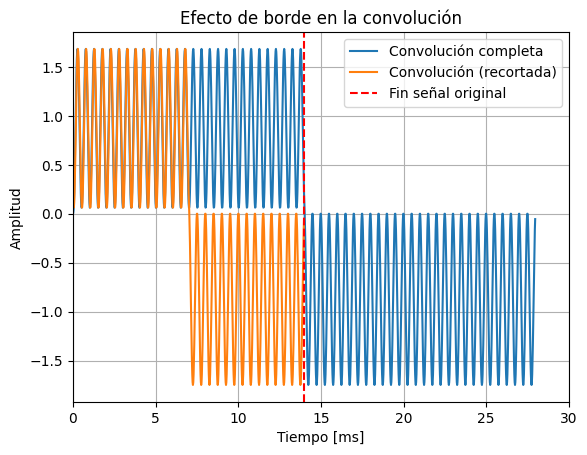

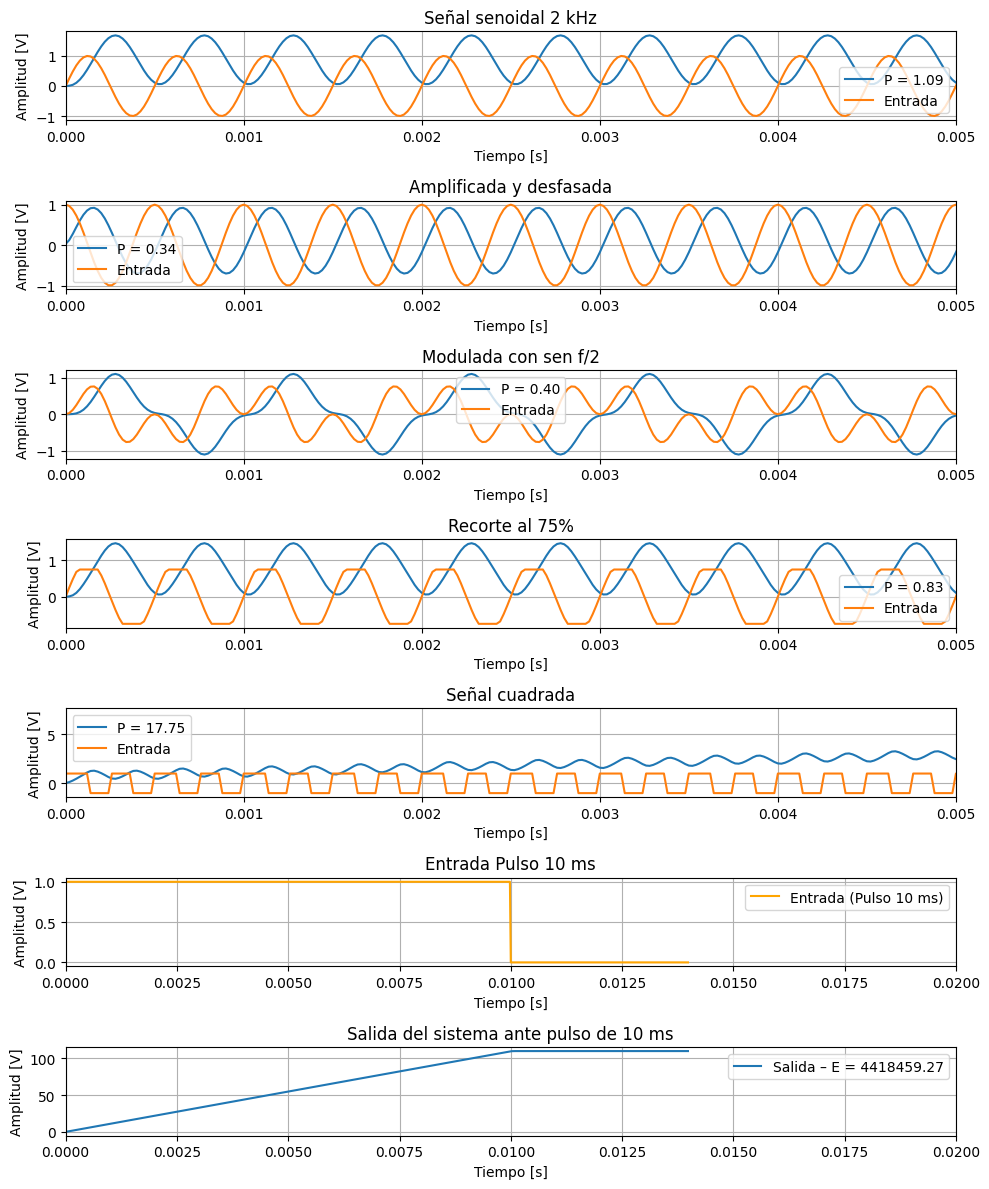

In [3]:

import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
from scipy import signal

#𝑦[𝑛]-1.5⋅𝑦[𝑛−1]+0.5⋅𝑦[𝑛−2]=3⋅10−2⋅𝑥[𝑛]+5⋅10−2⋅𝑥[𝑛−1]+3⋅10−2⋅𝑥[𝑛−2]
 

a = np.array([1, -1.5, 0.5]) #coeficientes de y
b = np.array([0.03, 0.05, 0.03]) #coeficientes de x

fs = 50000 # frecuencia de muestreo, aplica para todas las señales
N = 700  # cantidad de muestras, aplica para todas las señales 
fx = 2000 #frecuencia para las senoidales
Ts = 1/fs
t = np.arange(N) * Ts


def mi_funcion_sen (A0, fx, phase, t ):
    x = A0 * np.sin(2 * np.pi * fx * t + phase)
    return x

def funcion_cuadrada (fcuad):
    x = signal.square(2 * np.pi * fcuad * t)
    return x

def pulsos(t, T):
    pulso = np.where(t < T, 1.0, 0.0)
    return pulso

#señal original
x_senoidal = mi_funcion_sen(A0 = 1, fx = fx, phase = 0, t = t)

#señal desfazada
x_desfazada = mi_funcion_sen(A0 = 1, fx = fx, phase = np.pi/2, t = t)

#señal modulada con una de la mitad de su frecuencia
x_aux = mi_funcion_sen(A0 = 1, fx = fx/2, phase = 0, t = t)
x_modulada = x_senoidal * x_aux

#señal recortada al 75%
x_recortada = np.clip(x_senoidal, -0.75, 0.75, out=None)

#señal cuadrada 4KHz
x_cuadrada = funcion_cuadrada(fcuad = 4000)

#pulso de 10ms
x_pulsos = pulsos(t, 0.01)

entradas = [x_senoidal, x_desfazada, x_modulada, x_recortada, x_cuadrada, x_pulsos]

salidas = []
potencia = []
energia = []
for i, x in enumerate(entradas):
    y = signal.lfilter(b, a, x)
    salidas.append(y)
    
delta = np.zeros(len(x_senoidal))
delta[0] = 1

h = signal.lfilter(b, a, delta)  #respuesta al impulso

y_conv = np.convolve(x_senoidal, h, mode='same')#[:len(x_senoidal)] #salida    
y_conv_full = np.convolve(x_senoidal, h, mode= 'full')
t_full = np.arange(len(y_conv_full)) / fs

plt.figure()
plt.plot(t_full*1000, y_conv_full, label='Convolución completa', color='C0')
plt.plot(t[:len(y_conv)]*1000, y_conv, label='Convolución (recortada)', color='C1')
plt.axvline(len(x_senoidal)/fs*1000, color='r', linestyle='--', label='Fin señal original')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Efecto de borde en la convolución')
plt.xlim(0, 30) 
plt.legend()
plt.grid(True)

#Graficos
fig, axs = plt.subplots(7, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Señal senoidal
axs[0].plot(t, salidas[0], label = f"P = {np.mean(salidas[0]**2):.2f}")
axs[0].plot(t, x_senoidal, label = "Entrada")
axs[0].set_title("Señal senoidal 2 kHz")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud [V]")
axs[0].set_xlim(0, 0.005)
axs[0].legend()
axs[0].grid(True)

# Amplificada y desfasada
axs[1].plot(t, salidas[1], label = f"P = {np.mean(salidas[1]**2):.2f}")
axs[1].plot(t, x_desfazada, label = "Entrada")
axs[1].set_title("Amplificada y desfasada")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud [V]")
axs[1].set_xlim(0, 0.005)
axs[1].legend()
axs[1].grid(True)

# Modulacion en amplitud
axs[2].plot(t, salidas[2], label = f"P = {np.mean(salidas[2]**2):.2f}")
axs[2].plot(t, x_modulada, label = "Entrada")
axs[2].set_title("Modulada con sen f/2")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud [V]")
axs[2].set_xlim(0, 0.005)
axs[2].legend()
axs[2].grid(True)

# Señal recortada
axs[3].plot(t, salidas[3], label = f"P = {np.mean(salidas[3]**2):.2f}")
axs[3].plot(t, x_recortada, label = "Entrada")
axs[3].set_title("Recorte al 75%")
axs[3].set_xlabel("Tiempo [s]")
axs[3].set_ylabel("Amplitud [V]")
axs[3].set_xlim(0, 0.005)
axs[3].legend()
axs[3].grid(True)

# Señal cuadrada
axs[4].plot(t, salidas[4], label = f"P = {np.mean(salidas[4]**2):.2f}")
axs[4].plot(t, x_cuadrada, label = "Entrada")
axs[4].set_title("Señal cuadrada")
axs[4].set_xlabel("Tiempo [s]")
axs[4].set_ylabel("Amplitud [V]")
axs[4].set_xlim(0, 0.005)
axs[4].legend()
axs[4].grid(True)

# Entrada (pulso)
axs[5].plot(t, x_pulsos, "orange", label="Entrada (Pulso 10 ms)")
axs[5].set_title("Entrada Pulso 10 ms")
axs[5].set_xlabel("Tiempo [s]")
axs[5].set_ylabel("Amplitud [V]")
axs[5].set_xlim(0, 0.02)
axs[5].legend()
axs[5].grid(True)

# Salida (respuesta al pulso)
axs[6].plot(t, salidas[5], label=f"Salida – E = {np.sum(salidas[5]**2):.2f}")
axs[6].set_title("Salida del sistema ante pulso de 10 ms")
axs[6].set_xlabel("Tiempo [s]")
axs[6].set_ylabel("Amplitud [V]")
axs[6].set_xlim(0, 0.02)   
axs[6].legend()
axs[6].grid(True)



# Ajustar todo
plt.tight_layout()
plt.show()

Los sistemas LTI pueden clasificarse como estables o inestables según la ubicación de los polos de su función de transferencia, la cual se obtiene a partir de los coeficientes de la ecuación en diferencias:
$$H(z)=\frac{B(z)}{A(z)}$$
Los polos de  son las raices de *A(z)* Los polos de *H(z)* son las raíces del polinomio *A(z)*, y representan los valores de $z$ que hacen que la función se vuelva infinita. La posición de estos polos en el plano $z$ determina el comportamiento temporal del sistema:
- Si los polos se encuentran **dentro** del círculo unitario ($|z|<1$), el sistema es **estable** y su respuesta al impulso decae con el tiempo.
- Si los polos están **fuera** del círculo ($|z|>1$), el sistema es **inestable**, y las respuestas crecen sin límite.
- Si algún polo se ubica exactamente **sobre** el círculo unitario ($|z|=1$), el sistema se considera **marginalmente estable**, y su salida tiende a oscilar o a presentar un crecimiento limitado.

En el caso del sistema analizado, los polos son:
$$z_1=1, z_2=0,5$$
Por lo tanto, el sistema es **marginalmente estable**. Esto se refleja en las simulaciones: algunas señales mantienen un comportamiento acotado, mientras que otras exhiben una tendencia creciente dependiendo de su contenido en continua (DC).

El polo $z=1$ está asociado a la frecuencia cero (DC). En consecuencia:
- Si la señal de entrada posee un promedio distinto de cero ($𝐷𝐶≠0$), la salida tiende a crecer linealmente con el tiempo.
- Si la señal tiene $𝐷𝐶=0$ (como ocurre con las senoidales centradas en cero), la salida se mantiene acotada.
  
En las simulaciones realizadas:

- La **señal cuadrada** presenta oscilaciones asociadas a su frecuencia fundamental, junto con un crecimiento lineal causado por su componente continua.
- El **pulso** produce un crecimiento mientras está activo; al finalizar, la salida converge hacia un valor constante.
- El resto de las señales muestran una salida semejante a la entrada, manteniéndose estables a lo largo del tiempo.

Además, en el gráfico correspondiente se observa el efecto de borde característico de la convolución discreta. Este fenómeno ocurre cuando las señales se superponen parcialmente durante el proceso de convolución, generando un transitorio al inicio y al final de la señal. Dicho efecto se debe a que, en los extremos, no existen suficientes muestras de la señal para completar la operación de desplazamiento y multiplicación, lo que produce valores intermedios o distorsiones temporales.


## Respuesta al impulso

La respuesta al impulso se define como la salida de un sistema LTI cuando la entrada es una delta unitaria $\delta[n]$. En este caso, se calculó utilizando nuevamente la función *lfilter*, pero tomando como señal de entrada la secuencia $\delta[n]$.

Dado que un sistema LTI queda completamente caracterizado por su respuesta al impulso $h[n]$, la salida ante cualquier entrada $x[n]$ puede obtenerse de dos maneras equivalentes:
1. Resolviendo la ecuación en diferencias mediante lfilter, aplicando directamente la señal de entrada $x[n]$.
2. Convolucionando la entrada $x[n]$ con la respuesta al impulso $h[n]$
   
Por lo tanto, ambas salidas deben coincidir. Esto se verifica en los gráficos comparativos presentados a continuación, donde se observa que la salida obtenida por lfilter y la obtenida por convolución son idénticas (diferencias menores pueden deberse únicamente a efectos numéricos).

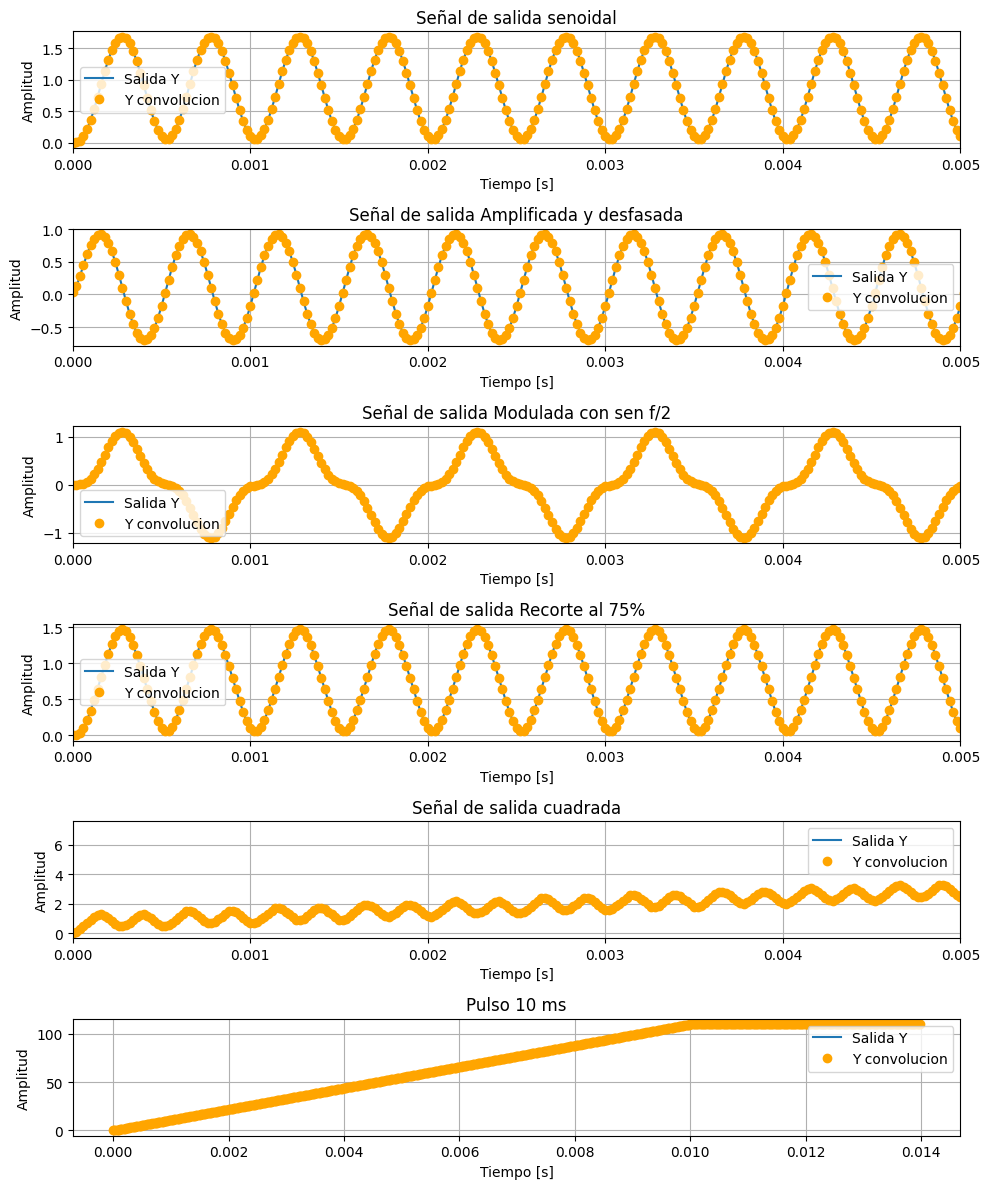

In [6]:
#CALCULAR LA RESPUESTA AL IMPULSO

#senoidal
delta_sen = np.zeros(len(x_senoidal))
delta_sen[0] = 1
h_sen = signal.lfilter(b, a, delta_sen)  #respuesta al impulso
y_conv_sen = np.convolve(x_senoidal, h_sen)[:len(x_senoidal)] #salida

#amplificada
delta_amp = np.zeros(len(x_desfazada))
delta_amp[0] = 1
h_amp = signal.lfilter(b, a, delta_amp)  #respuesta al impulso
y_conv_amp = np.convolve(x_desfazada, h_amp)[:len(x_desfazada)] #salida

#modulada
delta_mod = np.zeros(len(x_modulada))
delta_mod[0] = 1
h_mod = signal.lfilter(b, a, delta_mod)  #respuesta al impulso
y_conv_mod = np.convolve(x_modulada, h_mod)[:len(x_modulada)] #salida

#recortada
delta_rec = np.zeros(len(x_recortada))
delta_rec[0] = 1
h_rec = signal.lfilter(b, a, delta_rec)  #respuesta al impulso
y_conv_rec = np.convolve(x_recortada, h_rec)[:len(x_recortada)] #salida

#cuadrada
delta_cuad = np.zeros(len(x_cuadrada))
delta_cuad[0] = 1
h_cuad = signal.lfilter(b, a, delta_cuad)  #respuesta al impulso
y_conv_cuad = np.convolve(x_cuadrada, h_cuad)[:len(x_cuadrada)] #salida

#pulso
delta_pul = np.zeros(len(x_pulsos))
delta_pul[0] = 1
h_pul = signal.lfilter(b, a, delta_pul)  #respuesta al impulso
y_conv_pul = np.convolve(x_pulsos, h_pul)[:len(x_pulsos)] #sa"lida




#Graficos
fig, axs = plt.subplots(6, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Señal senoidal
axs[0].plot(t, salidas[0], label ="Salida Y")
axs[0].plot(t, y_conv_sen, "o", color='orange' , label="Y convolucion")
axs[0].set_title("Señal de salida senoidal")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud")
axs[0].set_xlim(0, 0.005)
axs[0].legend()
axs[0].grid(True)

# Amplificada y desfasada
axs[1].plot(t, salidas[1], label = "Salida Y")
axs[1].plot(t, y_conv_amp, "o", color='orange' , label = "Y convolucion")
axs[1].set_title("Señal de salida Amplificada y desfasada")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud")
axs[1].set_xlim(0, 0.005)
axs[1].legend()
axs[1].grid(True)

# Modulacion en amplitud
axs[2].plot(t, salidas[2], label = "Salida Y")
axs[2].plot(t, y_conv_mod,"o", color='orange' , label = "Y convolucion")
axs[2].set_title("Señal de salida Modulada con sen f/2")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud")
axs[2].set_xlim(0, 0.005)
axs[2].legend()
axs[2].grid(True)

# Señal recortada
axs[3].plot(t, salidas[3], label ="Salida Y")
axs[3].plot(t, y_conv_rec,"o", color='orange' , label = "Y convolucion")
axs[3].set_title("Señal de salida Recorte al 75%")
axs[3].set_xlabel("Tiempo [s]")
axs[3].set_ylabel("Amplitud")
axs[3].set_xlim(0, 0.005)
axs[3].legend()
axs[3].grid(True)

# Señal cuadrada
axs[4].plot(t, salidas[4], label = "Salida Y")
axs[4].plot(t, y_conv_cuad,"o", color='orange' , label = "Y convolucion")
axs[4].set_title("Señal de salida cuadrada")
axs[4].set_xlabel("Tiempo [s]")
axs[4].set_ylabel("Amplitud")
axs[4].set_xlim(0, 0.005)
axs[4].legend()
axs[4].grid(True)

# Pulso rectangular
axs[5].plot(t, salidas[5], label = "Salida Y")
axs[5].plot(t, y_conv_pul, "o", color='orange' , label = "Y convolucion")
axs[5].set_title("Pulso 10 ms")
axs[5].set_xlabel("Tiempo [s]")
axs[5].set_ylabel("Amplitud")
axs[4].set_xlim(0, 0.005)
axs[5].legend()
axs[5].grid(True)

# Ajustar todo
plt.tight_layout()
plt.show()

# 2) Respuesta al impulso y salida de sistemas LTI

Retomando lo desarrollado en el punto anterior, se resolvieron los dos sistemas propuestos utilizando la función *lfilter*.

El primer sistema está definido por la siguiente ecuación en diferencias:
$$y[n]=x[n]+3\cdot x[n-10]$$
En este caso, dado que la ecuación presenta varios términos nulos intermedios, fue necesario construir el vector de coeficientes de una forma particular para que refleje correctamente los retardos de la señal, tal como se muestra en el código correspondiente.

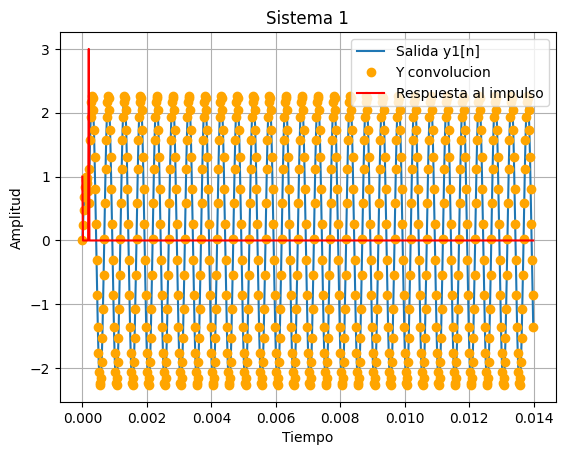

In [7]:
a1 = np.array([1]) #coeficientes de y
b1 = np.zeros(11) #coeficientes de x
b1[0] = 1
b1[10] = 3

h1 = signal.lfilter(b1, a1, delta)  #respuesta al impulso
y1_conv= np.convolve(x_senoidal, h1)[:len(x_senoidal)]
y1 = signal.lfilter(b1, a1, x_senoidal)

plt.figure()
plt.plot(t, y1, label="Salida y1[n]")
plt.plot(t, y1_conv, "o",color='orange' , label="Y convolucion")
plt.plot(t, h1, "-",color='red' , label="Respuesta al impulso")
plt.title("Sistema 1")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)


Nuevamente, se calculó la señal de salida mediante dos métodos: por un lado, aplicando la convolución entre la entrada y la respuesta al impulso, y por otro, utilizando la función lfilter con los coeficientes del sistema.
Al comparar los resultados, se observa en el gráfico que ambas salidas coinciden exactamente, lo que confirma experimentalmente la equivalencia teórica entre ambos procedimientos para sistemas LTI.


El segundo sistema está representado por la siguiente ecuación en diferencias:
$$y[n]=x[n]+3\cdot y[n-10]$$
En este caso, también se presentan varios términos nulos, aunque asociados a los retardos de la salida $y[n]$. Para resolverlo, se aplicó el mismo criterio que en el sistema anterior al definir los coeficientes correspondientes en los arreglos de *lfilter*.

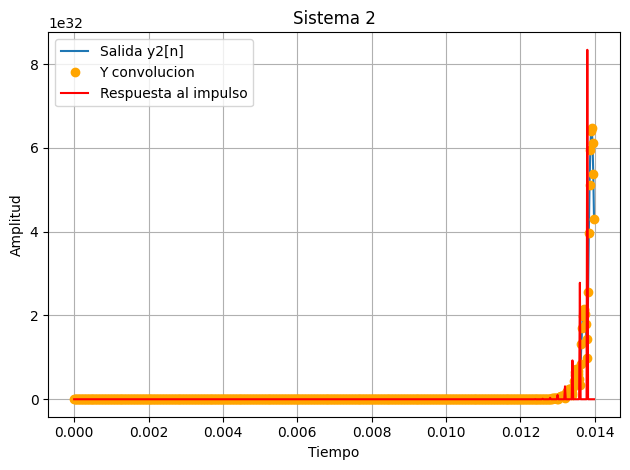

In [8]:
a2 = np.zeros(11) #coeficientes de y
a2[0] = 1
a2[10] = -3

b2 = np.array([1]) #coeficientes de x

h2 = signal.lfilter(b2, a2, delta)  #respuesta al impulso
y2_conv = np.convolve(x_senoidal, h2)[:len(x_senoidal)]
y2 = signal.lfilter(b2, a2, x_senoidal)


plt.figure()
plt.plot(t, y2, label="Salida y2[n]")
plt.plot(t, y2_conv, "o",color='orange' , label="Y convolucion")
plt.plot(t, h2, "-",color='red' , label="Respuesta al impulso")
plt.title("Sistema 2")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Nuevamente, se observa que ambas salidas coinciden de manera casi idéntica, lo que confirma la validez de los resultados obtenidos mediante el código y verifica experimentalmente la equivalencia entre la resolución por convolución y por ecuación en diferencias en sistemas LTI.

# 3) Bonus

El modelo de Windkessel permite estimar el gasto cardíaco a partir del análisis del contorno del pulso arterial. La impedancia arterial (Z), descrita por el fisiólogo Otto Frank, representa las propiedades físicas de las arterias y las resistencias que encuentra la sangre al circular, lo que genera variaciones de presión y volumen. Estas variaciones dependen de:
- La fuerza de eyección del ventrículo izquierdo.
- La complianza arterial, que absorbe parte de la energía cinética del latido (distensibilidad arterial).
- La resistencia de los vasos periféricos.
- La presencia de ondas reflejadas.
![Modelo Windkessel utilizado por bomberos en siglo XIX](https://campusvygon.com/es/wp-content/uploads/sites/7/2020/11/72PX-wirdkensell-BOMBEROS-01-1536x545.jpg)
En 1899, Frank propuso un modelo basado en el Windkessel, inspirado en un dispositivo alemán usado por bomberos para transformar un flujo pulsátil de agua en uno continuo. Aplicado al sistema cardiovascular, las correspondencias son:
- Sistema reservorio: venas.
- Bomba pulsátil: corazón.
- Componente elástico/dinámico: grandes arterias (aorta, femoral) que almacenan energía para mantener el flujo continuo tras el cierre de la válvula aórtica.
- Componente restrictivo: arteriolas periféricas que limitan el flujo.
![Modelo Windkessel cardivascular](https://campusvygon.com/es/wp-content/uploads/sites/7/2020/11/72PX-wirdkensell-SISTEMA-CARDIO-VASCULAR-02-1536x637.jpg)
Este modelo permite calcular la presión y el flujo arterial mediante la siguiente ecuación diferencial:
$$C\cdot \frac{dP}{dt}+\frac{1}{R}\cdot P=Q \Leftrightarrow \frac{dP(t)}{dt}+\frac{1}{RC}P(t)=\frac{1}{C}Q(t)$$
donde $P(t)=presión$, $Q(t)=flujo$, $C=compliance$ y $R=resistencia periférica$. Definiendo $\tau=RC$, la ecuación se puede discretizar usando el método de *Backward Euler*:

Aproximación (evaluado en n):
$$\frac{dP}{dt}\approx \frac{P[n]-P[n-1]}{T_s}$$
Susituyendo:
$$C\frac{P[n]-P[n-1]}{T_s}+\frac{1}{R}P[n]=Q[n]$$
Reordenando:
$$(\frac{C}{T_s}+\frac{1}{R})P[n]=\frac{C}{T_s}P[n-1]+Q[n]$$
Entonces
$$P[n]=\frac{\frac{C}{T_s}P[n-1]+Q[n]}{\frac{C}{T_s}+\frac{1}{R}}$$

Para la simulación en Python, se usan valores típicos:
- *R* (resistencia vascular sistemica) tipica $\approx 0,15-0,33 mmHg\cdot s \cdot mL^{-1}$
- *C* (compliance arterial) tipica: $\approx 4-5 mL/mmHg$
- $\tau=RC$ suele estar en el orden de $0,5-3 s$

Con esta discretización podemos simular tanto un latido aislado como un tren de latidos y observar cómo se comporta la presión en función del flujo de entrada.


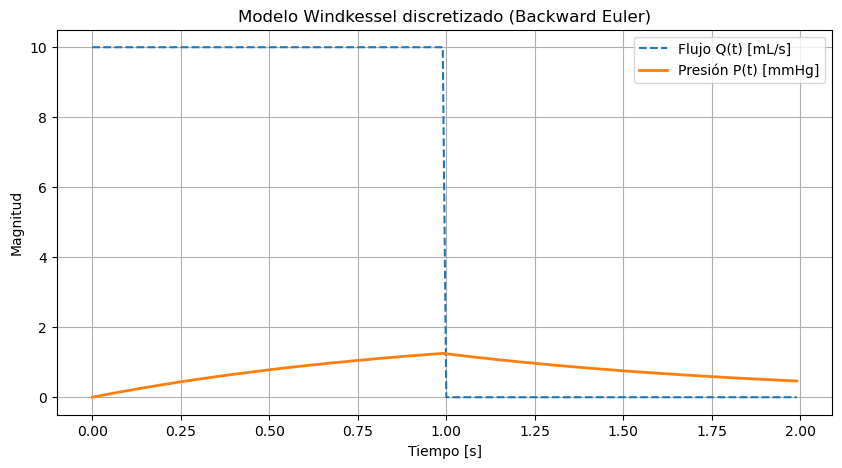

In [7]:
C = 5.0     # mL/mmHg
R = 0.2     # mmHg·s/mL
Ts_wk = 0.01   # paso temporal [s]
T_wk = 2       # tiempo total [s]
N_wk = int(T_wk / Ts_wk)

# Señal de entrada: flujo Q(t)
t_wk = np.arange(N_wk) * Ts_wk
Q = 10 * (t_wk < 1)   # flujo constante de 10 mL/s durante 1 segundo

# Inicialización de presión
P = np.zeros(N_wk)
P[0] = 0  # condición inicial

# Coeficientes para Backward Euler
alpha = C / Ts_wk
den = alpha + 1 / R

# Iteración recursiva
for n in range(1, N_wk):
    P[n] = (alpha * P[n-1] + Q[n]) / den

# Graficar resultados
plt.figure(figsize=(10,5))
plt.plot(t_wk, Q, label="Flujo Q(t) [mL/s]", linestyle="--")
plt.plot(t_wk, P, label="Presión P(t) [mmHg]", linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Magnitud")
plt.title("Modelo Windkessel discretizado (Backward Euler)")
plt.legend()
plt.grid(True)
plt.show()

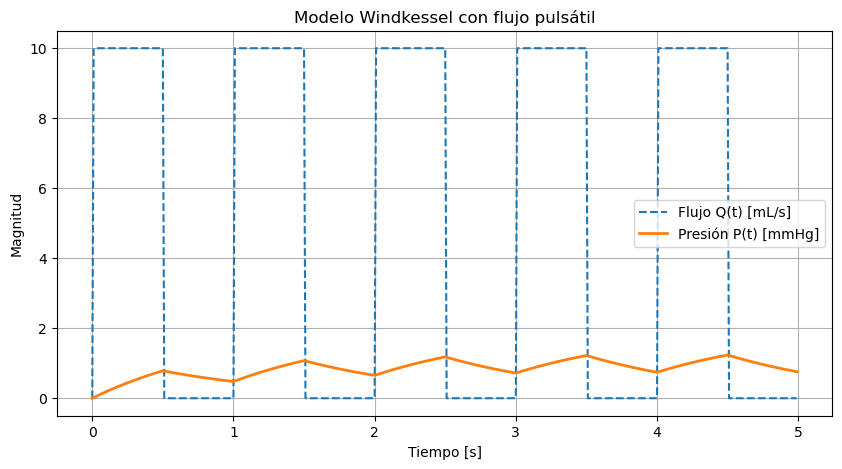

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros fisiológicos
C = 5.0       # mL/mmHg
R = 0.2       # mmHg·s/mL
Ts = 0.01     # paso temporal [s]
T_total = 5   # tiempo total [s] para varios latidos
N = int(T_total / Ts)

# Señal de entrada: flujo Q(t) pulsátil (simula 1 Hz, 60 latidos/min)
f_heart = 1.0  # Hz
t = np.arange(N) * Ts
Q = 10 * (np.sin(2 * np.pi * f_heart * t) > 0)  # tren de pulsos

# Inicialización de presión
P = np.zeros(N)
P[0] = 0  # condición inicial

# Coeficientes para Backward Euler
alpha = C / Ts
den = alpha + 1/R

# Iteración recursiva (Backward Euler)
for n in range(1, N):
    P[n] = (alpha * P[n-1] + Q[n]) / den

# Graficar resultados
plt.figure(figsize=(10,5))
plt.plot(t, Q, label="Flujo Q(t) [mL/s]", linestyle="--")
plt.plot(t, P, label="Presión P(t) [mmHg]", linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Magnitud")
plt.title("Modelo Windkessel con flujo pulsátil")
plt.legend()
plt.grid(True)
plt.show()

En el primer gráfico se observa cómo el flujo de sangre ingresa al sistema de manera constante durante un latido, luego cae bruscamente a cero y se mantiene así hasta el siguiente. La presión resultante refleja dos fenómenos: durante la subida, la compliance del vaso permite que se expanda para almacenar parte del flujo; durante la caída, la resistencia del sistema provoca que la presión disminuya.

En el gráfico del tren de pulsos, el flujo es periódico y se repite con cada latido. La presión no vuelve completamente a cero entre pulsos, lo que genera un aumento progresivo de su magnitud. Esto se debe a que cada latido se superpone con la presión residual del anterior hasta que se alcanza un régimen estable, donde la presión oscila dentro de un rango constante.

# Conclusion

El trabajo muestra cómo resolver ecuaciones en diferencias usando la función lfilter de la librería scipy.signal, calcular la respuesta al impulso y obtener la salida de un sistema mediante convolución. También se analizó cómo se comportan los sistemas LTI frente a distintas señales de entrada, observando cambios en su energía o potencia y cómo la ubicación de los polos afecta la forma de la señal de salida.

Además, se discretizó una ecuación diferencial, lo que permitió explorar modelos biomédicos y su aplicación práctica, como el cálculo del gasto cardíaco, llevando conceptos matemáticos a un ejemplo real.

El informe ofrece un respaldo teórico que ayuda a entender el comportamiento de sistemas y señales, y los ejemplos prácticos facilitan la conexión entre teoría y aplicación.

En resumen, aunque las tareas fueron en gran parte repetitivas, el trabajo requirió análisis y reflexión para comprender por qué ocurren los fenómenos observados

## Bibliografia

- [Evolución del análisis del contorno del pulso](https://campusvygon.com/es/evolucion-analisis-contorno-del-pulso/)
- [Modelo de Windkessel y análisis biomédico](https://revistadigital.amca.mx/wp-content/uploads/2022/06/MieBT2-03.pdf)


## Autoevaluacion

*Indicar una opción (marcada con negrita):*

**Resolví la tarea con seguridad**
Resolví la tarea, pero tengo dudas
Resolví la tarea,pero no entendí bien
No pude resolverla y no entendí
Responder:

*¿Qué aprendiste al hacer esta tarea?*

En esta tarea aprendi a resolver ecuaciones en diferencias y a analizar la salida de los sistemas LTI aante distintas señales de entrada. Aprendi a calcular la salida de distintas formas, como hallar la respuesta al impulso y como trabajar con ella. Modele mi primer sistema biomedico, lo que me resulto muy interesante de hacer.

*¿Qué te quedó claro? ¿Qué te sigue costando?*

Me quedaron algunas dudas con respecto al analisis de las salidas de los sistemas y la relacion de los polos con la señal generada.

*Indicar si se utilizó IA:*

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**
No usé IA.
*En caso afirmativo, indicar una opción o varias:*

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones